# 📈 Análise de Séries Temporais - Air Passengers

**Objetivo:** Aplicar técnicas de decomposição e modelagem de séries temporais sobre um conjunto real de dados de transporte aéreo de passageiros.

**Fonte dos dados:** [Airline Passengers Dataset](https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv)

**Conteúdo do projeto:**
- Análise visual exploratória
- Decomposição da série temporal
- Modelagem da tendência
- Análise da sazonalidade
- Análise dos resíduos
- Conclusões

In [36]:
# Bibliotecas essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para análise de séries temporais
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression

# Para Modelagem
from statsmodels.tsa.holtwinters import ExponentialSmoothing

### **Carga e Preparação dos Dados**

In [6]:
# Carregar os dados diretamente da URL
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url)

# Exibir as primeiras linhas
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
# Transformar 'Month' em datetime
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

# Definir como índice
df.set_index('Month', inplace=True)

# Confirmar
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

### **Análise Exploratória**

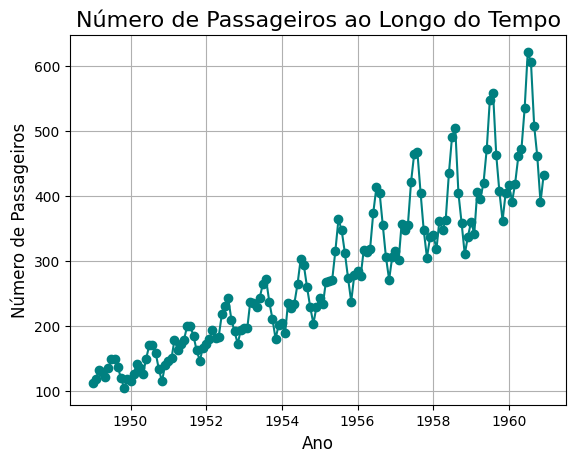

In [20]:
# Tamanho do Gráfico
plt.figuresize=(14,6)

# Plot da série temporal
plt.plot(df.index, df['Passengers'], marker='o', linestyle='-', color='teal')

# Títulos e labels
plt.title('Número de Passageiros ao Longo do Tempo', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Passageiros', fontsize=12)

# Grid e exibição
plt.grid(True)
plt.show()

## 📊 Análise Visual da Série Temporal

A partir da análise visual da série temporal completa, foi possível observar os seguintes aspectos:

- **Tendência:** A série apresenta um comportamento crescente ao longo do tempo, com um padrão de "zig-zag" embutido sobre uma tendência de longo prazo ascendente.
  
- **Sazonalidade:** Foi identificada uma sazonalidade consistente, caracterizada por um aumento no número de passageiros durante o primeiro semestre do ano, seguido de uma redução no segundo semestre.

- **Outliers:** Não foram observadas presenças claras de outliers ou valores atípicos na série temporal.

Esta análise preliminar confirma que a série possui componentes importantes para serem explorados nas próximas etapas de decomposição e modelagem.


### **Decomposição da Série Temporal**

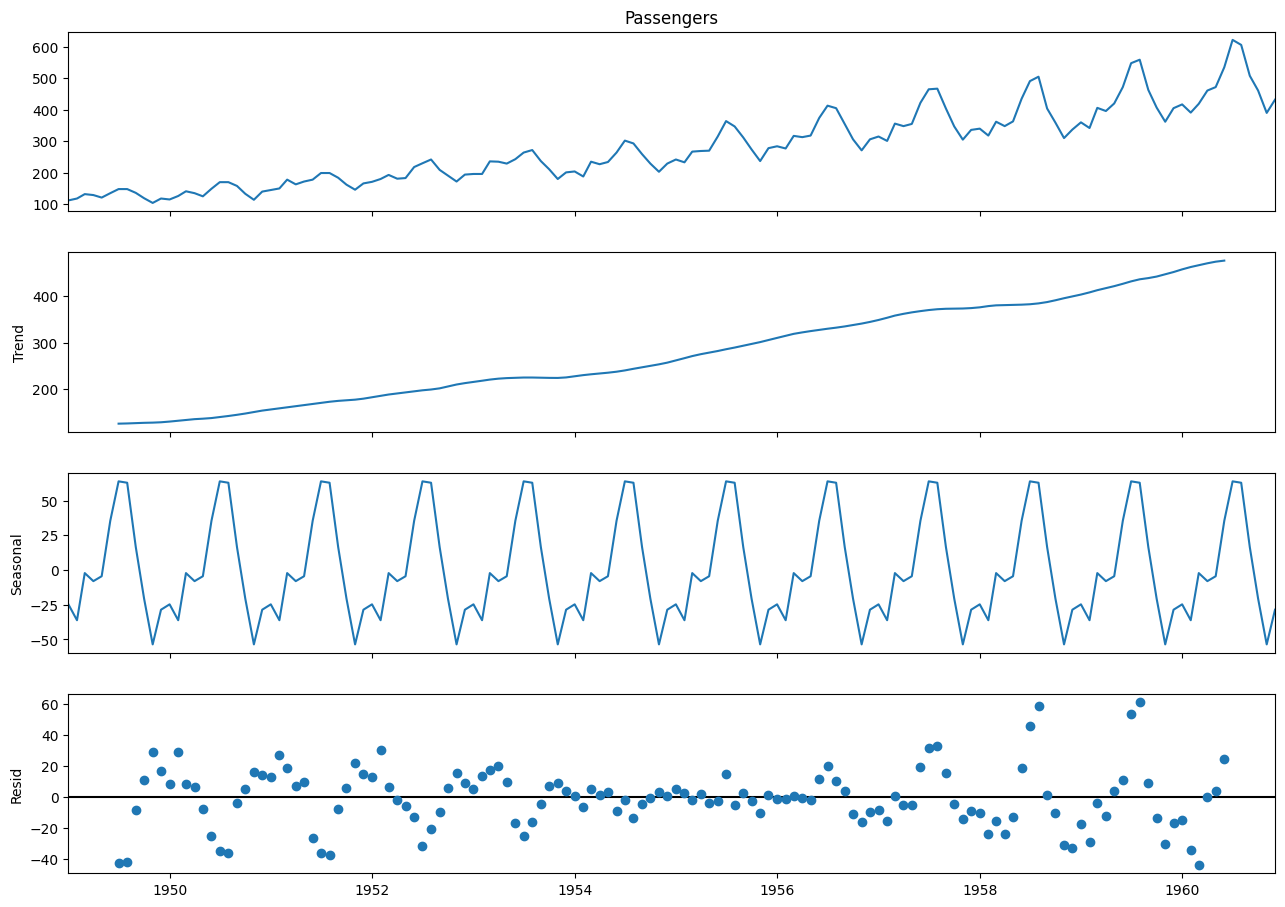

In [21]:
# Decomposição aditiva da série temporal
decomposition = seasonal_decompose(df['Passengers'], model='additive', period=12)

# Plot da decomposição
fig = decomposition.plot()
fig.set_size_inches(14,10)
plt.show()

## 🔍 Decomposição da Série Temporal

A decomposição aditiva da série temporal permitiu separar claramente os principais componentes da série:

- **Tendência:** A tendência geral de crescimento ao longo do tempo foi bem capturada, confirmando a análise visual inicial.

- **Sazonalidade:** O componente sazonal apresentou um padrão consistente, com aumento no número de passageiros durante os bimestres do primeiro semestre, seguido de uma leve queda antes de novos aumentos. Este comportamento reforça a presença de um ciclo sazonal regular.

- **Resíduos:** Os resíduos, em grande parte, exibem um comportamento de ruído aleatório. No entanto, foi observado um período de maior estabilidade entre aproximadamente 1954 e 1957, seguido por uma dispersão mais acentuada nos anos finais da série. Essa observação pode indicar variações na dinâmica da série ao longo do tempo.

A decomposição valida que a série possui tanto uma tendência quanto uma sazonalidade bem definidas, elementos que deverão ser considerados nas próximas etapas de modelagem.

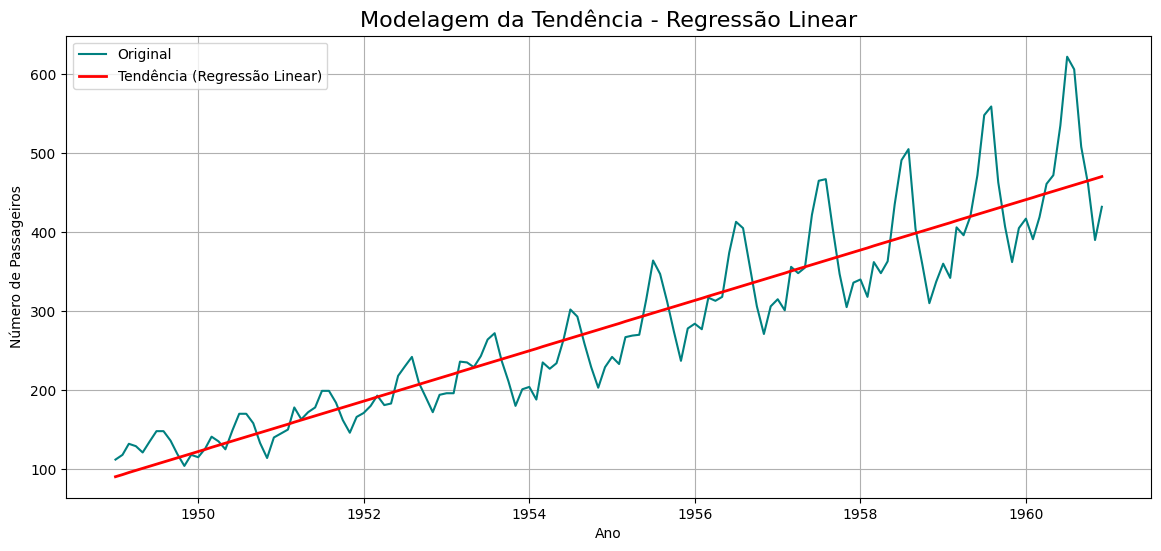

In [22]:
# Criar variável de tempo
df['TimeIndex'] = np.arange(len(df))

# Defini X e y
X = df['TimeIndex'].values.reshape(-1, 1)
y = df['Passengers'].values

# ajustar modelo de regressão linear
lr = LinearRegression()
lr.fit(X, y)

# Predições
df['Trend_Pred'] = lr.predict(X)

# Plot da série com tendência
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Passengers'], label='Original', color='teal')
plt.plot(df.index, df['Trend_Pred'], label='Tendência (Regressão Linear)', color='red', linewidth=2)

# Títulos e legendas
plt.title('Modelagem da Tendência - Regressão Linear', fontsize=16)
plt.xlabel('Ano')
plt.ylabel('Número de Passageiros')
plt.legend()
plt.grid(True)
plt.show()

## 📈 Modelagem da Tendência

A modelagem da tendência da série foi realizada utilizando uma regressão linear simples sobre uma variável de tempo.

- **Ajuste da tendência:** A linha de tendência estimada pela regressão linear capturou de maneira eficaz o comportamento de crescimento de longo prazo da série.

- **Qualidade da representação:** Observou-se que a linha de tendência acompanha de forma consistente todo o período analisado, sem apresentar desvios significativos ou períodos em que não represente adequadamente o comportamento da série.

Esta etapa confirma que o componente de tendência pode ser modelado de forma simples e interpretável, fornecendo uma visão clara da evolução da demanda ao longo dos anos.


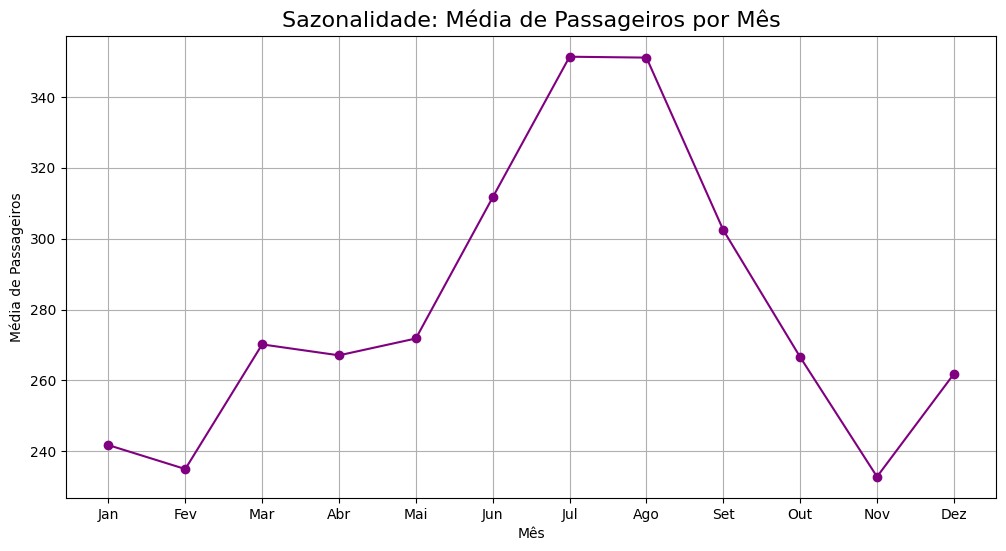

In [24]:
# Criar uma coluna com o número do mês
df['Mouth_Num'] = df.index.month

# Agrupar por mês e calcular média
month_avg = df.groupby('Mouth_Num')['Passengers'].mean()

# Plot da sazonalidade
plt.figure(figsize=(12, 6))
plt.plot(month_avg.index, month_avg.values, marker='o', linestyle='-', color='purple')

# Títulos e labels
plt.title('Sazonalidade: Média de Passageiros por Mês', fontsize=16)
plt.xlabel('Mês')
plt.ylabel('Média de Passageiros')
plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(True)
plt.show(True)
plt.show()

## 🔄 Análise da Sazonalidade

A análise quantitativa da sazonalidade foi conduzida através do cálculo da média de passageiros por mês ao longo de toda a série histórica.

- **Meses de maior demanda:** Os meses de **julho** e **agosto** apresentaram os maiores volumes médios de passageiros, superando a marca de 340 passageiros, possivelmente refletindo o impacto de períodos de férias.

- **Meses de menor demanda:** Os meses de **fevereiro** e **novembro** mostraram as menores médias, ficando abaixo de 240 passageiros.

- **Padrão sazonal observado:**
  - O ano inicia em um patamar de baixa demanda (dezembro para janeiro, com mínima em fevereiro).
  - A partir de março há uma recuperação gradual, com um equilíbrio em abril e maio.
  - Entre junho e agosto ocorre um pico sazonal expressivo.
  - De setembro a novembro observa-se uma queda acentuada.
  - Em dezembro, uma leve recuperação possivelmente associada às festividades de fim de ano.

A análise confirma que a série possui um componente sazonal bem definido, o que deverá ser considerado nas futuras etapas de modelagem preditiva.


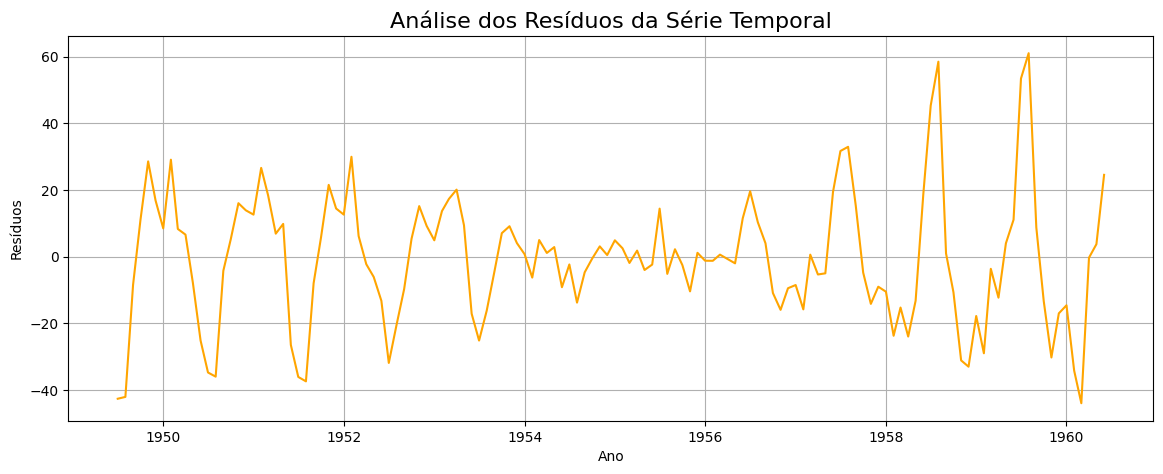

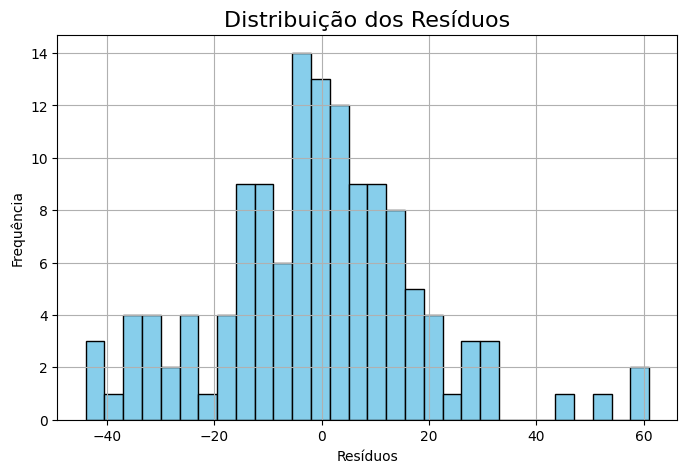

In [34]:
# Plotar os resíduos sozinhos para analise
plt.figure(figsize=(14, 5))
plt.plot(decomposition.resid.index, decomposition.resid, color='orange')

# Títulos e labels
plt.title('Análise dos Resíduos da Série Temporal', fontsize=16)
plt.xlabel('Ano')
plt.ylabel('Resíduos')
plt.grid(True)
plt.show()

# Histograma dos resíduos
plt.figure(figsize=(8, 5))
plt.hist(decomposition.resid.dropna(), bins=30, color='skyblue', edgecolor='black')

# Títulos e labels
plt.title('Distribuição dos Resíduos', fontsize=16)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

## 🎭 Análise dos Resíduos

A análise dos resíduos foi conduzida a partir da componente de resíduos da decomposição da série temporal.

- Os resíduos mantêm o padrão geral de oscilações ("zig-zag") observado anteriormente, com um comportamento mais estável no período central da série.  
- Observou-se um aumento da amplitude entre máximos e mínimos nos anos finais da série, evidenciando uma intensificação da variabilidade neste período.
- A análise do histograma dos resíduos revelou uma distribuição aproximadamente simétrica em torno de zero, com a maioria dos valores concentrados próximos a este centro e caindo gradualmente em direção aos extremos.  
  Não foram identificadas assimetrias ou distorções significativas.

Esses resultados indicam que a decomposição foi eficiente em capturar os componentes estruturais da série (tendência e sazonalidade), restando principalmente ruído aleatório nos resíduos.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


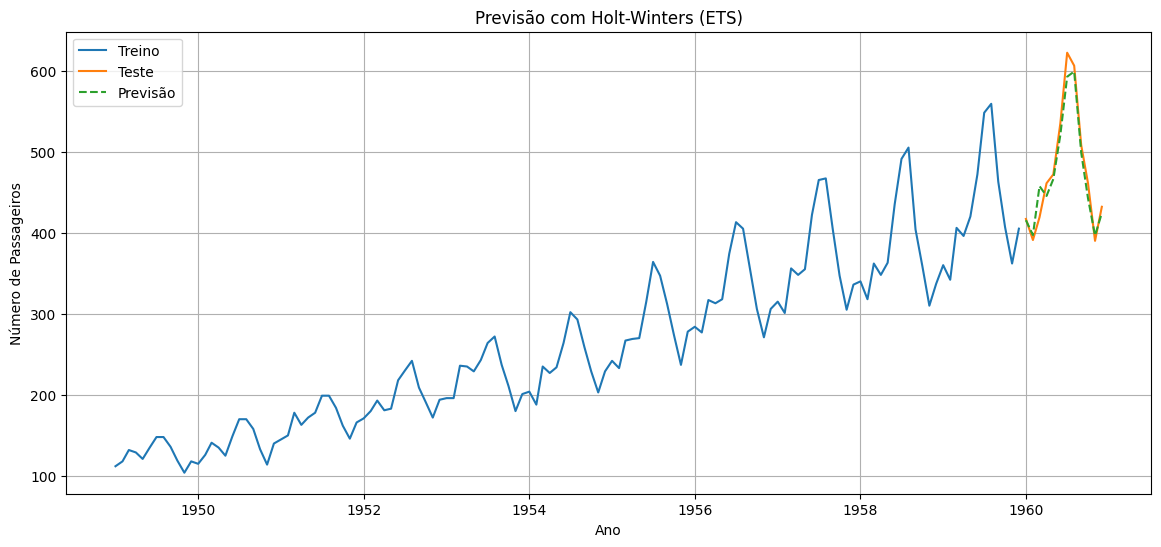

In [38]:
# Separando dados para teste
train = df.iloc[:-12]
test = df.iloc[-12:]

# Criar e ajustar o modelo
model = ExponentialSmoothing(train['Passengers'],
                             trend='add',
                             seasonal='add',
                             seasonal_periods=12)

fit_model = model.fit()

# Fazer a previsão
forecast = fit_model.forecast(steps=12)

# Plotar os resultados
plt.figure(figsize=(14,6))
plt.plot(train.index, train['Passengers'], label='Treino')
plt.plot(test.index, test['Passengers'], label='Teste')
plt.plot(forecast.index, forecast, label='Previsão', linestyle='--')
plt.title('Previsão com Holt-Winters (ETS)')
plt.xlabel('Ano')
plt.ylabel('Número de Passageiros')
plt.legend()
plt.grid(True)
plt.show()


## 🔮 Modelagem Preditiva com Holt-Winters (ETS)

Para a etapa de modelagem preditiva da série, foi implementado o método Holt-Winters Exponential Smoothing (ETS), que é particularmente indicado para séries temporais com tendência e sazonalidade — como a presente série de passageiros aéreos.

### Resultados:

- A previsão gerada capturou com alta fidelidade o padrão de tendência e sazonalidade da série, refletindo um comportamento muito próximo dos valores reais observados nos 12 meses reservados para teste.
- Embora a previsão tenha sido muito precisa, é importante reforçar que em cenários reais a "perfeição" em previsão é inatingível — modelos estatísticos sempre trabalham com incerteza e margem de erro.  
- O desempenho observado reforça a robustez do método Holt-Winters para este tipo de problema e valida a abordagem adotada neste projeto.

Esta etapa conclui um ciclo completo de análise e previsão de séries temporais, demonstrando técnicas fundamentais que podem ser aplicadas em diferentes contextos do mundo real.


# 📊 Resumo Executivo do Projeto

Este projeto teve como objetivo a análise e modelagem preditiva de uma série temporal composta pelo número de passageiros aéreos mensais registrados entre 1949 e 1960.

Através de uma abordagem sistemática, foram aplicadas as seguintes etapas:

1. **Exploração inicial da série temporal:** Identificação de tendências, padrões de sazonalidade e possíveis outliers.
2. **Decomposição da série:** Separação dos componentes de tendência, sazonalidade e resíduos, possibilitando uma análise aprofundada do comportamento da série ao longo do tempo.
3. **Análise dos resíduos:** Avaliação da presença de padrões não capturados pelos componentes do modelo e análise da distribuição dos resíduos.
4. **Modelagem preditiva:** Implementação de um modelo de Holt-Winters Exponential Smoothing (ETS) para prever o comportamento da série nos 12 meses finais. O modelo demonstrou excelente capacidade preditiva, com previsões muito próximas dos valores reais observados.

### Principais Conclusões:

- A série apresentou uma clara tendência de crescimento ao longo do tempo, acompanhada de um forte componente sazonal recorrente.
- A decomposição permitiu isolar essas componentes, evidenciando um comportamento residual predominantemente aleatório.
- O modelo Holt-Winters foi capaz de capturar tanto a tendência quanto a sazonalidade da série, gerando previsões robustas e coerentes.

### Habilidades demonstradas:

- Análise exploratória de séries temporais
- Decomposição de séries com componentes sazonais e tendência
- Interpretação de resíduos
- Modelagem preditiva com Holt-Winters (ETS)
- Visualização de dados
- Documentação profissional de notebooks para portfólio

Este projeto reforça a importância de uma abordagem estruturada para problemas de séries temporais e demonstra a aplicação prática de técnicas estatísticas clássicas para previsão de dados reais.
